In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

# Import required libraries
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

#https://plotly.com/python-api-reference/index.html

In [3]:
df_ = px.data.gapminder()
df_.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


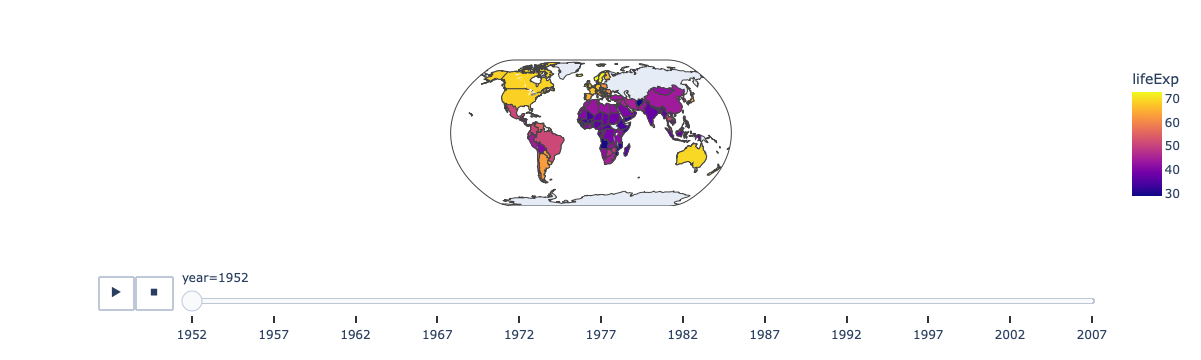

In [9]:
fig = px.choropleth(df_, locations='iso_alpha', color='lifeExp', hover_name='year', 
                    animation_frame='year', color_continuous_scale=px.colors.sequential.Plasma, projection='natural earth')
fig.show() 

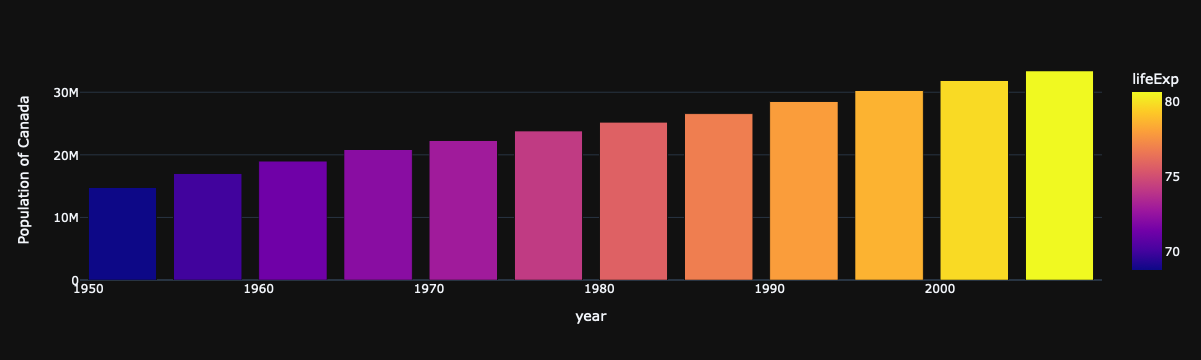

In [13]:
canada_data = df_.loc[df_.country == 'Canada', :]

fig = px.bar(canada_data, x='year', y='pop', color='lifeExp', labels={'pop': 'Population of Canada'},
             height=300, template='plotly_dark')
fig.show()

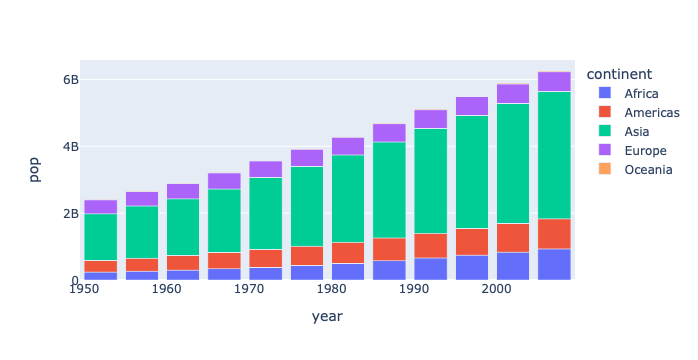

In [14]:
df = df_.groupby(['year', 'continent'])['pop'].sum().reset_index()

fig = px.bar(df, x='year' , y='pop', color='continent')
fig.show()

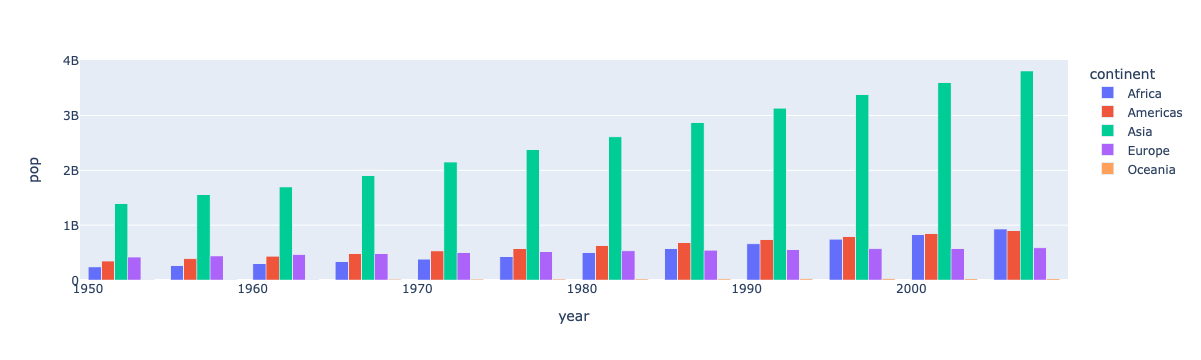

In [82]:
df = df_.groupby(['year', 'continent'])['pop'].sum().reset_index()

fig = px.bar(df, x='year' , y='pop', color='continent', barmode='group')
fig.show()

array([<AxesSubplot:title={'center':'pop'}, xlabel='year'>], dtype=object)

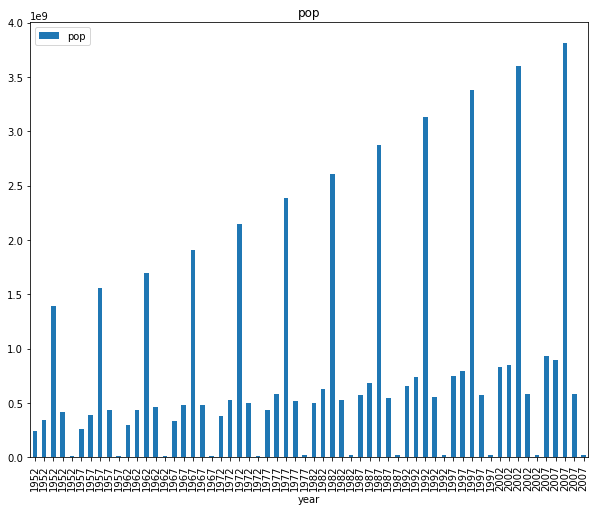

In [27]:
df.plot.bar(x='year', y='pop', figsize=(10, 8), subplots=True)

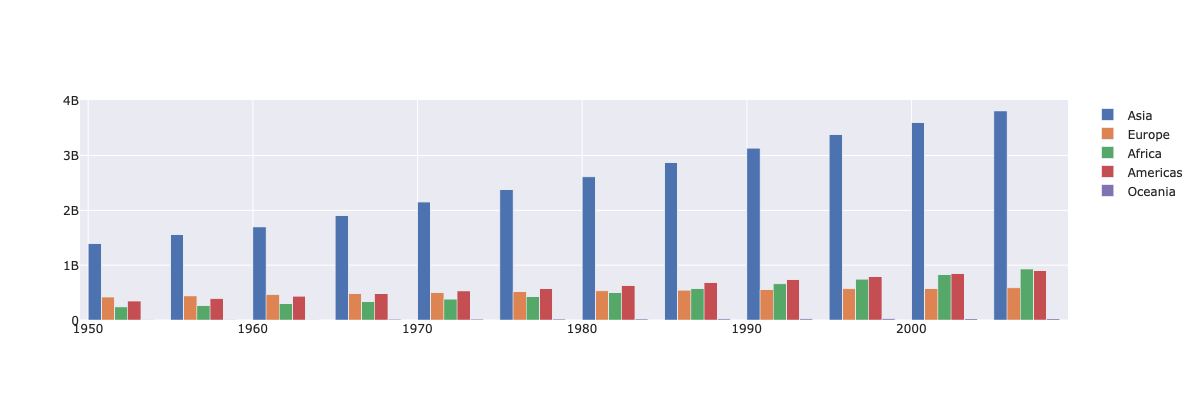

In [59]:
df = df_.groupby(['year', 'continent']).sum().reset_index()

fig = go.Figure(
    data=[
        go.Bar(name='Asia', x=df[df.continent=='Asia'].year, y=df[df.continent=='Asia']['pop']),
        go.Bar(name='Europe', x=df[df.continent=='Europe'].year, y=df[df.continent=='Europe']['pop']),
        go.Bar(name='Africa', x=df[df.continent=='Africa'].year, y=df[df.continent=='Africa']['pop']),
        go.Bar(name='Americas', x=df[df.continent=='Americas'].year, y=df[df.continent=='Americas']['pop']),
        go.Bar(name='Oceania', x=df[df.continent=='Oceania'].year, y=df[df.continent=='Oceania']['pop'])
    ]
)
#fig.update_layout(barmode='stack')
fig.layout.template='seaborn'
fig.layout.height=400
fig.show()

In [68]:
df_india = pd.read_csv('/Users/macbook/Desktop/projects/Github_Repositories/IBM5 - Data Visualization with Python/benim_kodlarim/Caste.csv')
df = df_india.copy()
df.head()

,state_name,is_state,year,gender,caste,convicts,under_trial,detenues,others
0,Andhra Pradesh,1,2001,Male,SC,1236,1836,0,5
1,Andhra Pradesh,1,2001,Male,ST,418,1205,0,1
2,Andhra Pradesh,1,2001,Male,OBC,1526,3359,4,8
3,Andhra Pradesh,1,2001,Male,Others,939,1960,0,8
4,Andhra Pradesh,1,2002,Male,SC,1177,1573,2,0


In [95]:
df= df_india[df_india['state_name'] == 'Maharashtra']
df = df.groupby(['year', 'gender',], as_index=False)[[ 'detenues', 'under_trial', 'convicts', 'others']].sum()
df.head()

,year,gender,detenues,under_trial,convicts,others
0,2001,Female,1,583,279,0
1,2001,Male,364,14863,6433,4
2,2002,Female,8,648,311,0
3,2002,Male,299,13869,6887,0
4,2003,Female,1,728,390,0


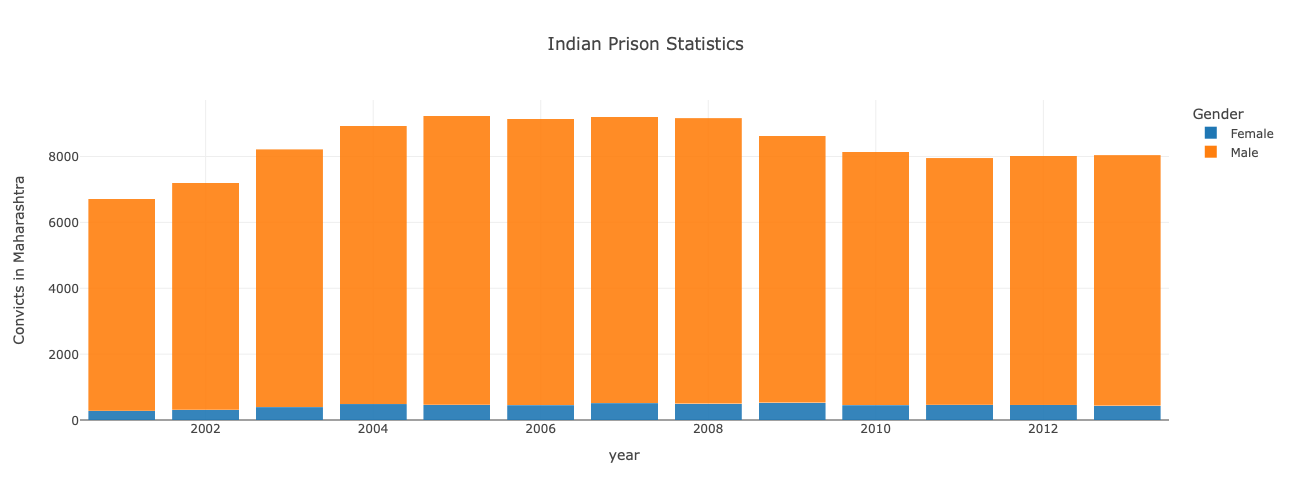

In [96]:
df= df_india[df_india['state_name'] == 'Maharashtra']
df = df.groupby(['year', 'gender',], as_index=False)[[ 'detenues', 'under_trial', 'convicts', 'others']].sum()

barchart = px.bar(df,
                 x='year',
                 y='convicts',
                 color='gender',
                 opacity=0.9,
                 orientation='v',
                 barmode='relative',
                 labels={"convicts":"Convicts in Maharashtra",
                  "gender":"Gender"},  
                  title='Indian Prison Statistics',
                  width=1000,
                  height=500,
                  template='gridon'
                 )

pio.show(barchart)

In [97]:
df= df_india[df_india['state_name'] == 'Maharashtra']
df.head()

,state_name,is_state,year,gender,caste,convicts,under_trial,detenues,others
636,Maharashtra,1,2001,Male,SC,1383,4025,113,1
637,Maharashtra,1,2001,Male,ST,1027,2573,58,0
638,Maharashtra,1,2001,Male,OBC,1680,2867,87,3
639,Maharashtra,1,2001,Male,Others,2343,5398,106,0
640,Maharashtra,1,2002,Male,SC,1346,2942,61,0


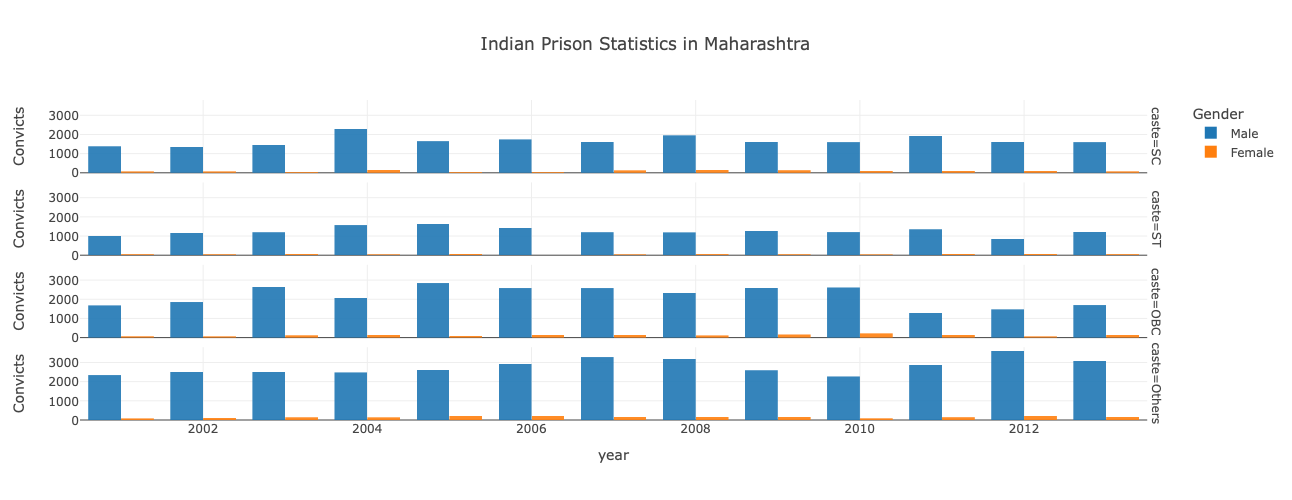

In [103]:
df= df_india[df_india['state_name'] == 'Maharashtra']

barchart = px.bar(df,
                 x='year',
                 y='convicts',
                 color='gender',
                 opacity=0.9,
                 orientation='v',
                 
                  # changed to group
                  barmode='group',
                 labels={"convicts":"Convicts",
                  "gender":"Gender"},  
                  title='Indian Prison Statistics in Maharashtra',
                  width=1000,
                  height=500,
                  template='gridon',
                  
                  # facet_row added
                  facet_row = 'caste'
                 )

pio.show(barchart)

In [157]:
# facet_col and facet_col_wrap, color_discrete_map added

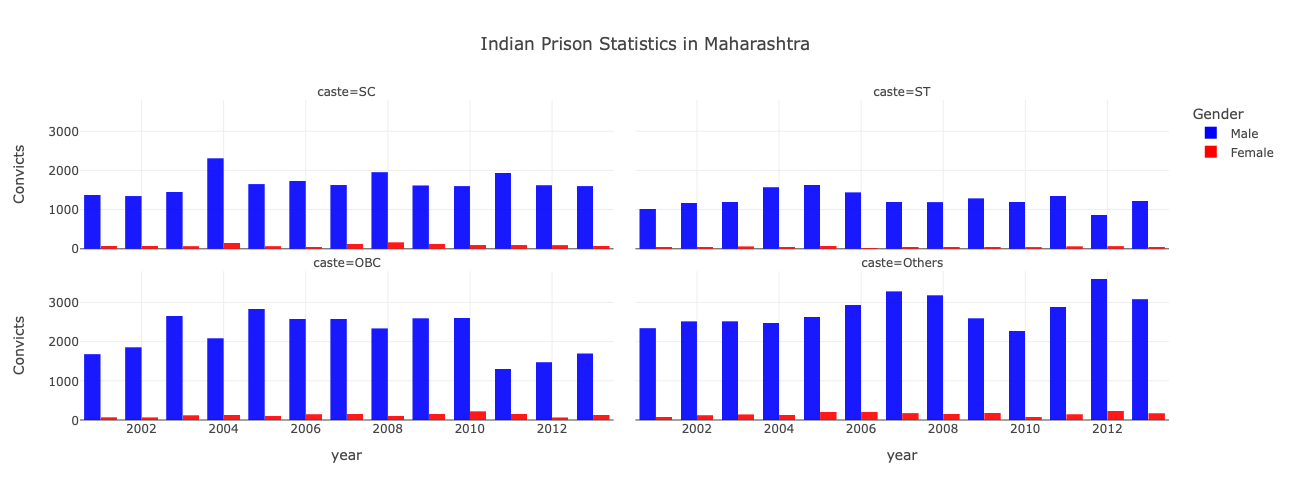

In [114]:
# 01- barmode changed to group
# 02- facet_col and facet_col_wrap added
# 03 - color_discrete_map added

df= df_india[df_india['state_name'] == 'Maharashtra']

barchart = px.bar(df,
                 x='year',
                 y='convicts',
                 color='gender',
                 opacity=0.9,
                 orientation='v',
                 
                  # 01- barmode changed to group
                  barmode='group',
                 labels={"convicts":"Convicts",
                  "gender":"Gender"},  
                  title='Indian Prison Statistics in Maharashtra',
                  width=1000,
                  height=500,
                  template='gridon',
                  
                  # 02- facet_col and facet_col_wrap added
                  facet_col = 'caste',
                  facet_col_wrap= 2,
                  
                  # 03 - color_discrete_map added
                  color_discrete_map={'Male' : 'blue', 'Female' : 'red'}
                 )

pio.show(barchart)

In [156]:
# color_continuous_scale, color_continuous_midpoint, range_color

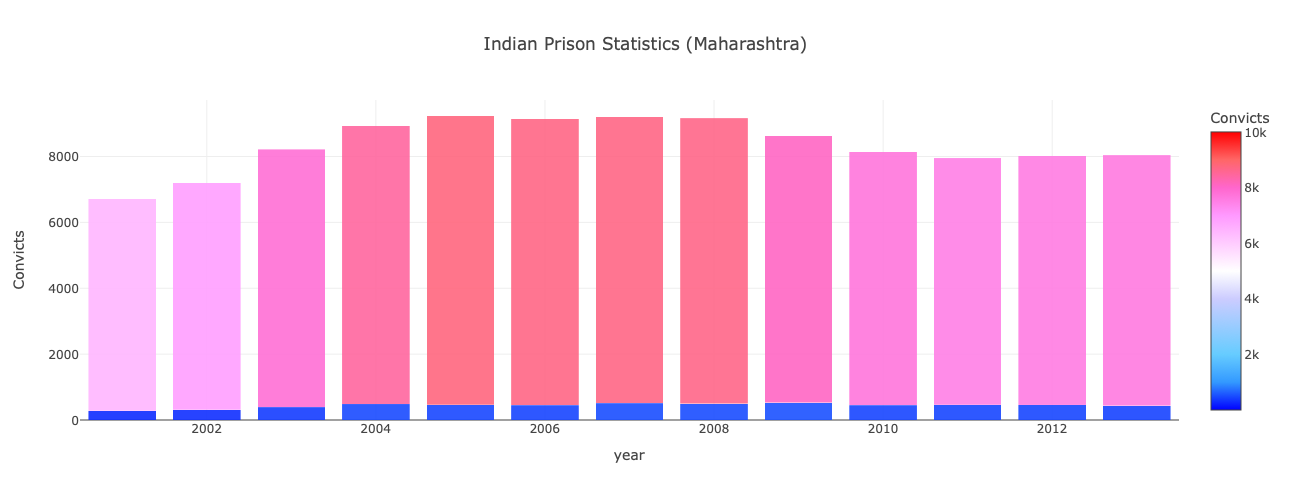

In [123]:
df= df_india[df_india['state_name'] == 'Maharashtra']
df = df.groupby(['year', 'gender',], as_index=False)[[ 'detenues', 'under_trial', 'convicts', 'others']].sum()

barchart = px.bar(df,
                 x='year',
                 y='convicts',
                 
                  # color changed 
                  color='convicts',
                 opacity=0.9,
                 orientation='v',
                 
                  barmode='relative',
                 labels={"convicts":"Convicts",
                  "gender":"Gender"},  
                  title='Indian Prison Statistics (Maharashtra)',
                  width=1000,
                  height=500,
                  template='gridon',
                  
                  # added
                  color_continuous_scale=px.colors.diverging.Picnic,
                  color_continuous_midpoint= 5000,
                  range_color = [1, 10000]
                  
                 )

pio.show(barchart)

In [134]:
df.head()

,year,gender,detenues,under_trial,convicts,others
0,2001,Female,1,583,279,0
1,2001,Male,364,14863,6433,4
2,2002,Female,8,648,311,0
3,2002,Male,299,13869,6887,0
4,2003,Female,1,728,390,0


In [155]:
# hover added , text

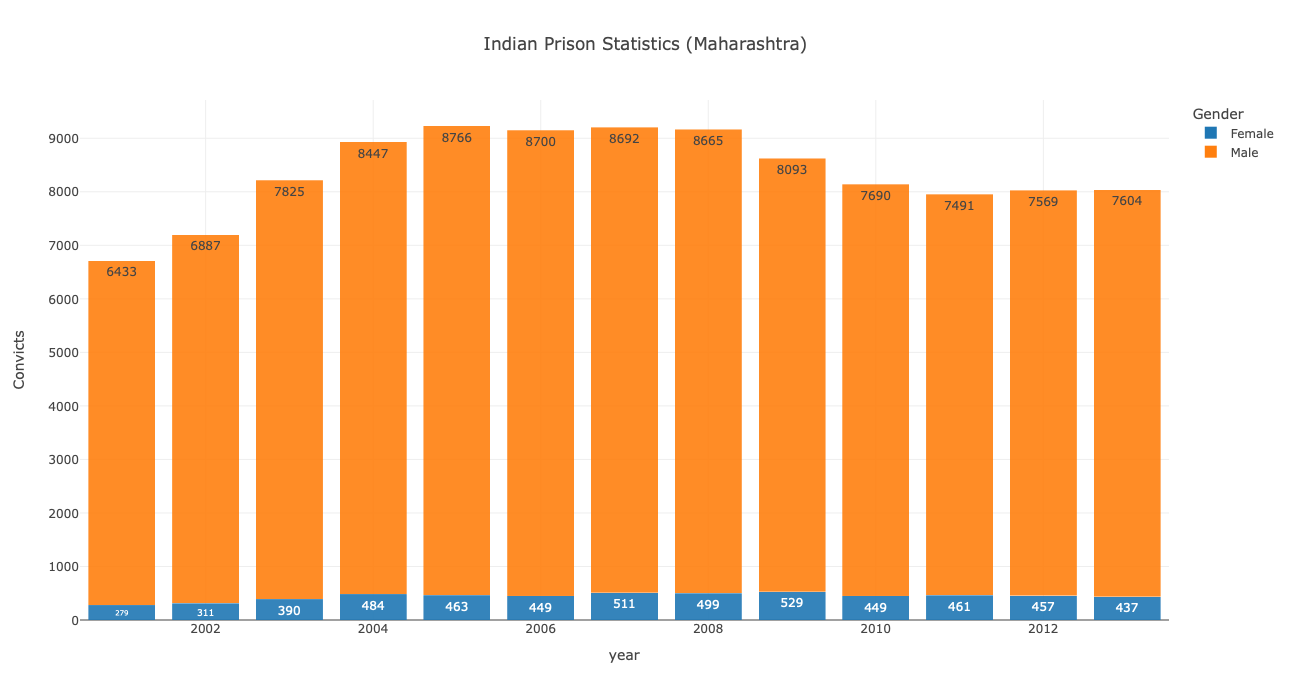

In [146]:
df= df_india[df_india['state_name'] == 'Maharashtra']
df = df.groupby(['year', 'gender',], as_index=False)[[ 'detenues', 'under_trial', 'convicts', 'others']].sum()

barchart = px.bar(df,
                 x='year',
                 y='convicts',
                 
                  color='gender',
                 opacity=0.9,
                 orientation='v',
                 
                  barmode='relative',
                 labels={"convicts":"Convicts",
                  "gender":"Gender"},  
                  title='Indian Prison Statistics (Maharashtra)',
                  width=1200,
                  height=700,
                  template='gridon',
                  
                  # text added 
                  text= 'convicts',
                  
                  # hover added
                  hover_name = 'under_trial',
                  hover_data=['detenues'],
                  custom_data=['others']
                 )

pio.show(barchart)

In [154]:
# error_y  and error_y_minus

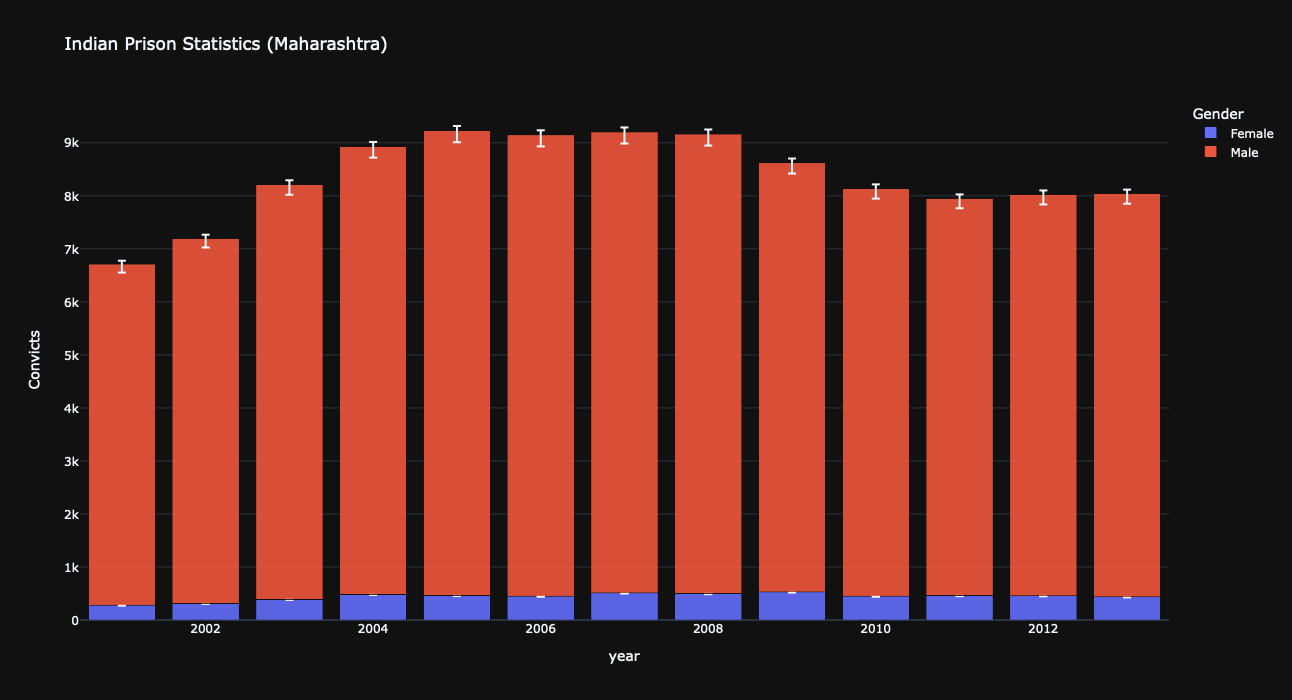

In [152]:
df= df_india[df_india['state_name'] == 'Maharashtra']
df = df.groupby(['year', 'gender',], as_index=False)[[ 'detenues', 'under_trial', 'convicts', 'others']].sum()


# fake margin of error, stndart deviation, or %95 confidence interval
df['err_plus'] = df['convicts']/100
df['err_minus'] = df['convicts']/40

barchart = px.bar(df,
                 x='year',
                 y='convicts',
                 
                  color='gender',
                 opacity=0.9,
                 orientation='v',
                 
                  barmode='relative',
                 labels={"convicts":"Convicts",
                  "gender":"Gender"},  
                  title='Indian Prison Statistics (Maharashtra)',
                  
                  width=1200,
                  height=700,
                  
                  template='plotly_dark',
                  
                  # error_y  and _minus added
                  error_y= 'err_plus',
                  error_y_minus= 'err_minus',
                  
                  # text canceled 
                  #text= 'convicts',
                  
                  # hover added
                  hover_name = 'under_trial',
                  hover_data=['detenues'],
                  custom_data=['others']
                 )

pio.show(barchart)

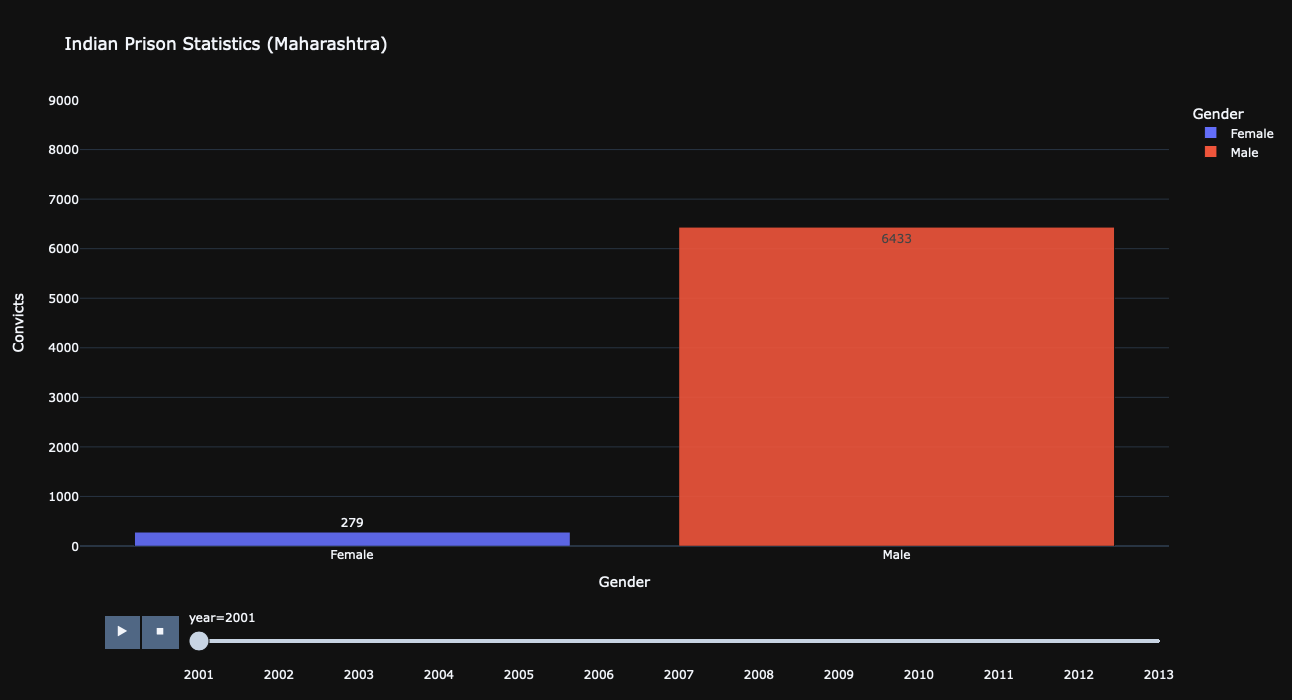

In [182]:
df= df_india[df_india['state_name'] == 'Maharashtra']
df = df.groupby(['year', 'gender',], as_index=False)[[ 'detenues', 'under_trial', 'convicts', 'others']].sum()


# fake margin of error, stndart deviation, or %95 confidence interval
df['err_plus'] = df['convicts']/100
df['err_minus'] = df['convicts']/40

barchart = px.bar(df,
                 x='gender',
                 y='convicts',
                 
                  # color changed to gender 
                  color='gender',
                 opacity=0.9,
                 orientation='v',
                 
                  barmode='relative',
                 labels={"convicts":"Convicts",
                  "gender":"Gender"},  
                  title='Indian Prison Statistics (Maharashtra)',
                  
                  width=1200,
                  height=700,
                  
                  template='plotly_dark',
                  
                  
                  # text canceled 
                  text= 'convicts',

                  
                  # hover added
                  hover_name = 'under_trial',
                  hover_data=['detenues'],
                  custom_data=['others'],
                  
                  #animation_frame
                  animation_frame='year',
                  #range_x= ['Female', 'Male'],
                  range_y=[0, 9000],
                  category_orders= {'years' : [2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001]},
                  
                 )
barchart.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 750
barchart.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

pio.show(barchart)

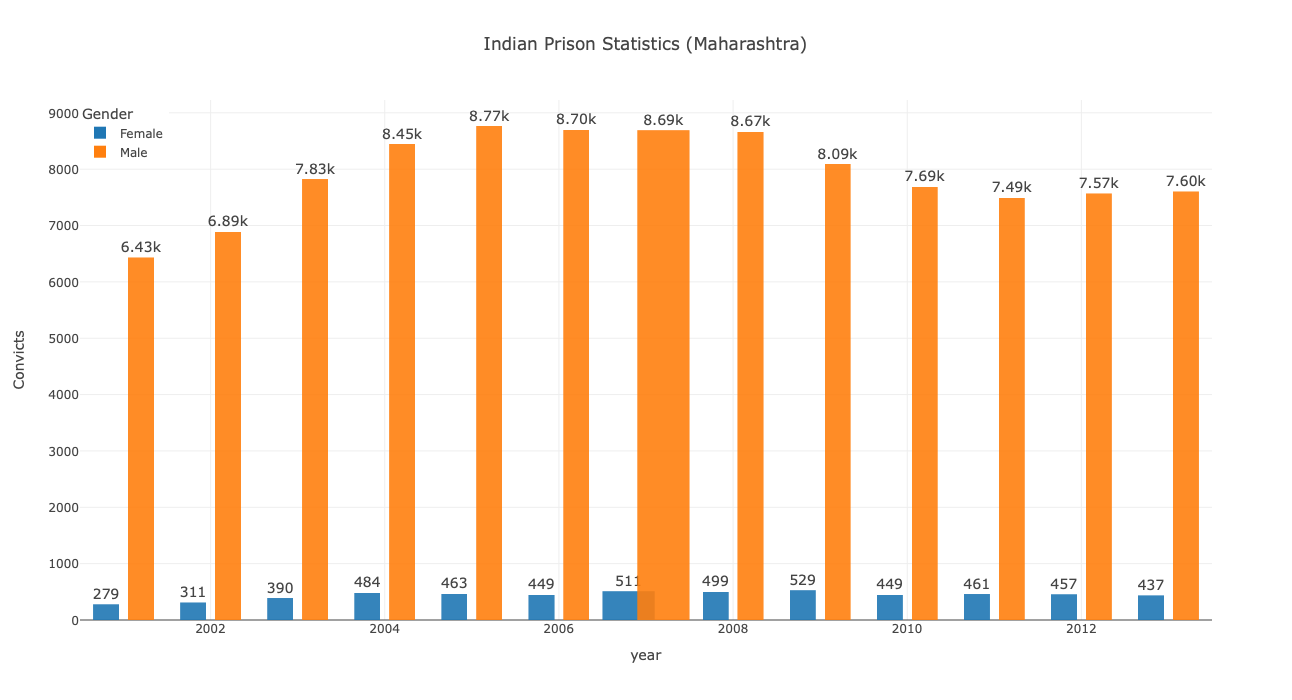

In [237]:
df= df_india[df_india['state_name'] == 'Maharashtra']
df = df.groupby(['year', 'gender',], as_index=False)[[ 'detenues', 'under_trial', 'convicts', 'others']].sum()


# fake margin of error, stndart deviation, or %95 confidence interval
df['err_plus'] = df['convicts']/100
df['err_minus'] = df['convicts']/40

barchart = px.bar(df,
                 x='year',
                 y='convicts',
                 
                  # color changed to gender 
                  color='gender',
                 opacity=0.9,
                 orientation='v',
                 
                  barmode='group',
                 labels={"convicts":"Convicts",
                  "gender":"Gender"},  
                  title='Indian Prison Statistics (Maharashtra)',
                  
                  width=1200,
                  height=700,
                  
                  template='gridon',
                  
                  
                  # text canceled 
                  text= 'convicts',

                  
                  # hover added
                  hover_name = 'under_trial',
                  hover_data=['detenues'],
                  custom_data=['others'],
                  
                  #range_x= [2000.5, 2013.5],
                 )

barchart.update_layout(uniformtext_minsize=14, uniformtext_mode='show',
                       legend={'x':0,'y':1.0},
                       #xaxis={'range': [2000.5, 2013.5]}
                      )

barchart.update_traces(texttemplate='%{text:.3s}', textposition='outside',
                        width=[.3,.3,.3,.3,.3,.3,.6,.3,.3,.3,.3,.3,.3])

pio.show(barchart)

In [203]:
list(np.arange(2001, 2014, 1))

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

In [231]:
dict(range=[2000.5,2013.5])

{'range': [2000.5, 2013.5]}

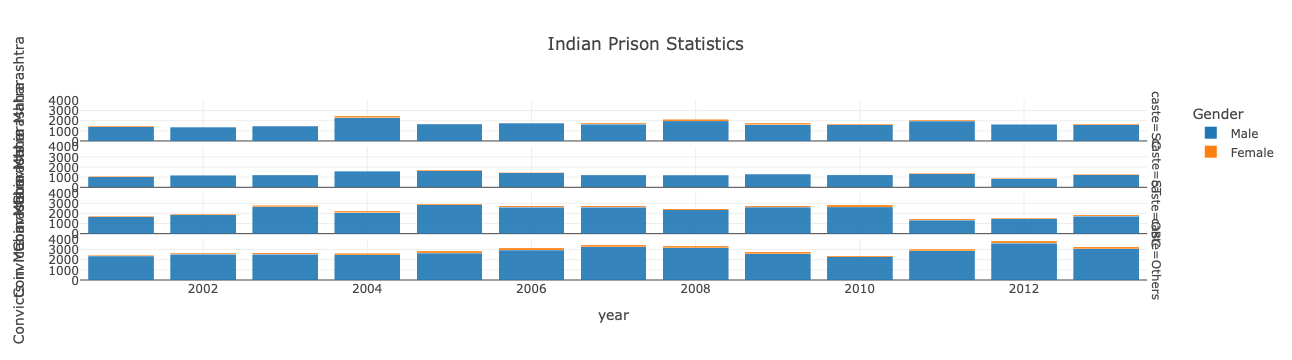

In [93]:
barchart = px.bar(
    data_frame=df,
    x="year",
    y="convicts",
    color="gender",               # differentiate color of marks
    opacity=0.9,                  # set opacity of markers (from 0 to 1)
    orientation="v",              # 'v','h': orientation of the marks
    barmode='relative',           # in 'overlay' mode, bars are top of one another.
                                  # in 'group' mode, bars are placed beside each other.
                                  # in 'relative' mode, bars are stacked above (+) or below (-) zero.
    #----------------------------------------------------------------------------------------------
    facet_row='caste',          # assign marks to subplots in the vertical direction
    # facet_col='caste',          # assigns marks to subplots in the horizontal direction
    # facet_col_wrap=2,           # maximum number of subplot columns. Do not set facet_row!

    # color_discrete_sequence=["pink","yellow"],               # set specific marker colors. Color-colum data cannot be numeric
    # color_discrete_map={"Male": "gray" ,"Female":"red"},     # map your chosen colors
    # color_continuous_scale=px.colors.diverging.Picnic,       # set marker colors. When color colum is numeric data
    # color_continuous_midpoint=100,                           # set desired midpoint. When colors=diverging
    # range_color=[1,10000],                                   # set your own continuous color scale
    #----------------------------------------------------------------------------------------------
    # text='convicts',            # values appear in figure as text labels
    # hover_name='under_trial',   # values appear in bold in the hover tooltip
    # hover_data=['detenues'],    # values appear as extra data in the hover tooltip
    # custom_data=['others'],     # invisible values that are extra data to be used in Dash callbacks or widgets

    # log_x=True,                 # x-axis is log-scaled
    # log_y=True,                 # y-axis is log-scaled
    # error_y="err_plus",         # y-axis error bars are symmetrical or for positive direction
    # error_y_minus="err_minus",  # y-axis error bars in the negative direction

    #labels={"convicts":"Convicts in Maharashtra",
    #"gender":"Gender"},           # map the labels of the figure
    #title='Indian Prison Statistics', # figure title
    #width=1400,                   # figure width in pixels
    #height=720,                   # figure height in pixels
    #template='gridon',            # 'ggplot2', 'seaborn', 'simple_white', 'plotly',
                                  # 'plotly_white', 'plotly_dark', 'presentation',
                                  # 'xgridoff', 'ygridoff', 'gridon', 'none'

    # animation_frame='year',     # assign marks to animation frames
    # # animation_group=,         # use only when df has multiple rows with same object
    # # range_x=[5,50],           # set range of x-axis
    # range_y=[0,9000],           # set range of x-axis
    # category_orders={'year':    # force a specific ordering of values per column
    # [2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001]},

)

# barchart.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
# barchart.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

# barchart.update_layout(uniformtext_minsize=14, uniformtext_mode='hide',
#                        legend={'x':0,'y':1.0}),
# barchart.update_traces(texttemplate='%{text:.2s}', textposition='outside',
#                        width=[.3,.3,.3,.3,.3,.3,.6,.3,.3,.3,.3,.3,.3])


pio.show(barchart)

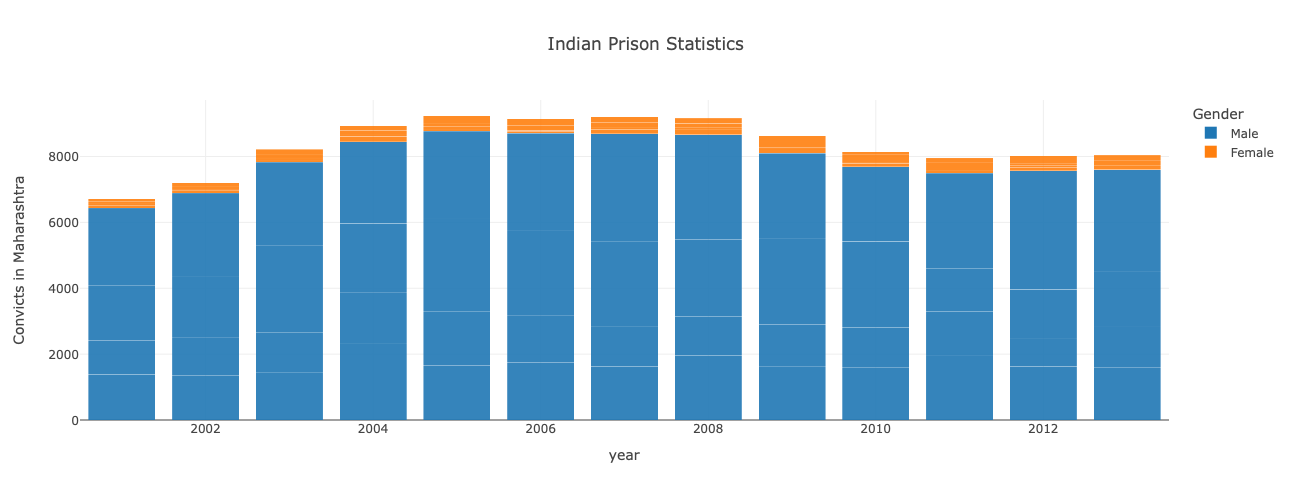

In [94]:
barchart = px.bar(df,
                 x='year',
                 y='convicts',
                 color='gender',
                 opacity=0.9,
                 orientation='v',
                 barmode='relative',
                 labels={"convicts":"Convicts in Maharashtra",
                  "gender":"Gender"},  
                  title='Indian Prison Statistics',
                  width=1000,
                  height=500,
                  template='gridon'
                  
                  facet
                 )

pio.show(barchart)

,year,gender,detenues,under_trial,convicts,others
0,2001,Female,1,583,279,0
1,2001,Male,364,14863,6433,4
2,2002,Female,8,648,311,0
3,2002,Male,299,13869,6887,0
4,2003,Female,1,728,390,0
